<a href="https://colab.research.google.com/github/AmeliaProbst/Coursera_Capstone/blob/master/BlueJays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load in libraries/packages
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [ ]:
#Load in data
import io
from google.colab import files
uploaded = files.upload()
df2 = pd.read_csv(io.BytesIO(uploaded['pitchdata.csv']))

Saving pitchdata.csv to pitchdata (1).csv


KeyboardInterrupt: ignored

In [ ]:
#View data types
df2.dtypes

GameID           object
PitchNumber       int64
Balls             int64
Strikes           int64
PitcherHand      object
BatSide          object
PlateHeight     float64
PlateSide       float64
CalledStrike      int64
dtype: object

In [ ]:
#Categorize certain variables
df2["CalledStrike"] = df2["CalledStrike"].astype("category")
df2["PitcherHand"] = df2["PitcherHand"].astype("category")
df2["BatSide"] = df2["BatSide"].astype("category")
df2['PitcherHand'].replace({'R':1, 'L':0}, inplace=True)
df2['BatSide'].replace({'R':1, 'L':0}, inplace=True)

In [ ]:
#View data
df2.head()


,GameID,PitchNumber,Balls,Strikes,PitcherHand,BatSide,PlateHeight,PlateSide,CalledStrike
0,B1A1464A-7D3A-4CA6-9DE6-02E81D30EC10,122,0,0,1,0,3.527729,0.249041,1
1,B1A1464A-7D3A-4CA6-9DE6-02E81D30EC10,124,0,2,1,0,5.241929,1.372541,0
2,BC7DF282-9C14-4A29-866E-05E7BC0C7234,133,0,0,0,0,2.618399,0.083787,1
3,BC7DF282-9C14-4A29-866E-05E7BC0C7234,134,0,1,0,0,2.901199,1.450787,0
4,BC7DF282-9C14-4A29-866E-05E7BC0C7234,197,0,0,1,0,1.949099,0.823387,1


In [ ]:
#Check for NA values

df2.isnull().sum()#PlateHeight & PlateSide have NA values

#Remove NA values from dataset
df2 = df2.dropna()

#Check NA values again
df2.isnull().sum()




GameID          0
PitchNumber     0
Balls           0
Strikes         0
PitcherHand     0
BatSide         0
PlateHeight     0
PlateSide       0
CalledStrike    0
dtype: int64

In [ ]:
#Make test and train sets
X = df2.iloc[:, 1:8].values
y = df2.iloc[:, 8].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #20% in test data 


In [ ]:
#Make a Random Forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #91% accuracy, how to make more accurate

clf.predict_proba(X_test)#probability of strike/no strike

#Get probabilities of a strike
res = clf.predict_proba(X_test)
strike_per = []

for i in range(len(res)):
    strike_per.append(res[i][1])#array of probabilities of strike



In [ ]:
df = pd.DataFrame(strike_per, columns=["Strike Probability"])
df.to_csv('strikeprob.csv', index=False)

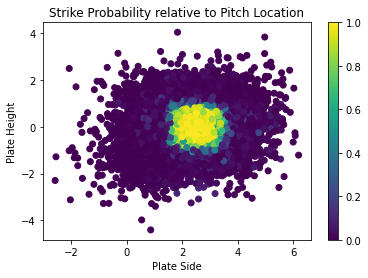

In [ ]:
#Creating graphic

#Data for pitch location from test set
side = [row[5] for row in X_test]
height = [row[6] for row in X_test]

# create a figure and axis
f, ax = plt.subplots()

# scatter the height against the side of the plate
points = ax.scatter(side, height, c = strike_per)
f.colorbar(points)
plt.title('Strike Probability relative to Pitch Location')
plt.xlabel('Plate Side')
plt.ylabel('Plate Height')
plt.show()